# **FIFA19 EDA📊 + Predictive Modelling🎮**

![fifa19](https://i.ytimg.com/vi/qTz8ZhNrEDA/maxresdefault.jpg)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa19/data.csv


# Loading Dataset.

In [2]:
df = pd.read_csv("../input/fifa19/data.csv")
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


**Checking the basic properties of dataset.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18207.0,9103.000000,5256.052511,0.0,4551.5,9103.0,13654.5,18206.0
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
Special,18207.0,1597.809908,272.586016,731.0,1457.0,1635.0,1787.0,2346.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0


# Cleaning Dataset.

In [5]:
df.drop(['Unnamed: 0','Photo','Flag','Club Logo'],axis=1,inplace=True)

In [6]:
df.isnull().sum().sort_values(ascending=False)

Loaned From    16943
CDM             2085
LCM             2085
ST              2085
LS              2085
               ...  
Value              0
Overall            0
Nationality        0
Age                0
ID                 0
Length: 85, dtype: int64

48 is repeating many times lets check if all of them are same ID or not.

In [7]:
missing_height = df[df['Height'].isnull()].index.tolist()
missing_weight = df[df['Weight'].isnull()].index.tolist()
if missing_height == missing_weight:
    print('They are same')
else:
    print('They are different')

They are same


As they are same I am assuming it will be same for other all columns too.

We will see it soon.

In [8]:
df.drop(df.index[missing_height],inplace =True)
df.isnull().sum()

ID                   0
Name                 0
Age                  0
Nationality          0
Overall              0
                  ... 
GKHandling           0
GKKicking            0
GKPositioning        0
GKReflexes           0
Release Clause    1516
Length: 85, dtype: int64

As we can see, we guessed right and now we have fewer null values.

In [9]:
df.drop(['Loaned From','Release Clause','Joined'],axis=1,inplace=True)

# EDA📊

**Plotting Pairplot for showing the relationship between Acceleration and SprintSpeed columns of dataset.**

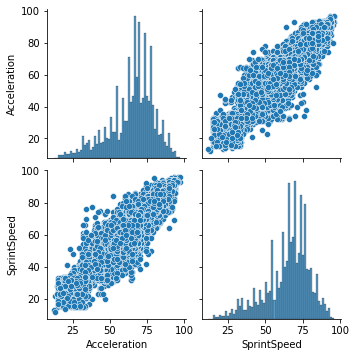

In [10]:
acceleration = df["Acceleration"] 
sprintSpeed = df["SprintSpeed"] 


data = pd.DataFrame({'Acceleration':acceleration,'SprintSpeed':sprintSpeed})

sns.pairplot(data)
plt.show()

**Plotting Pairplot for showing the relationship between Stamina and Strength columns of dataset.**

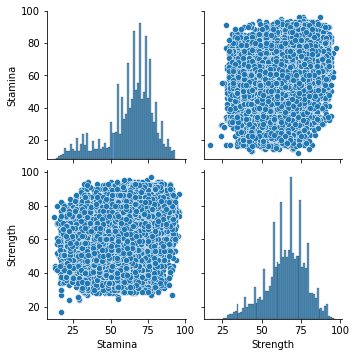

In [11]:
stamina = df["Stamina"]  
strength = df["Strength"] 


data = pd.DataFrame({'Stamina':stamina,'Strength':strength})

sns.pairplot(data)
plt.show()

**Plotting Pairplot for showing the relationship between StandingTackle and SlidingTackle columns of dataset.**

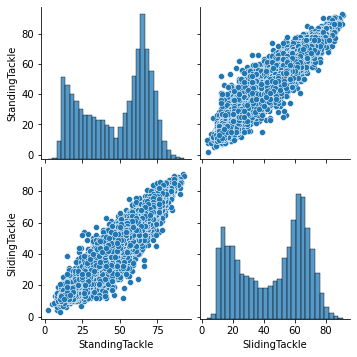

In [12]:
standingtackle = df["StandingTackle"]
slidingtackle = df["SlidingTackle"] 


data = pd.DataFrame({'StandingTackle':standingtackle,'SlidingTackle':slidingtackle})

sns.pairplot(data)
plt.show()

**Plotting Histogram to show the number of players for a particular age.**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


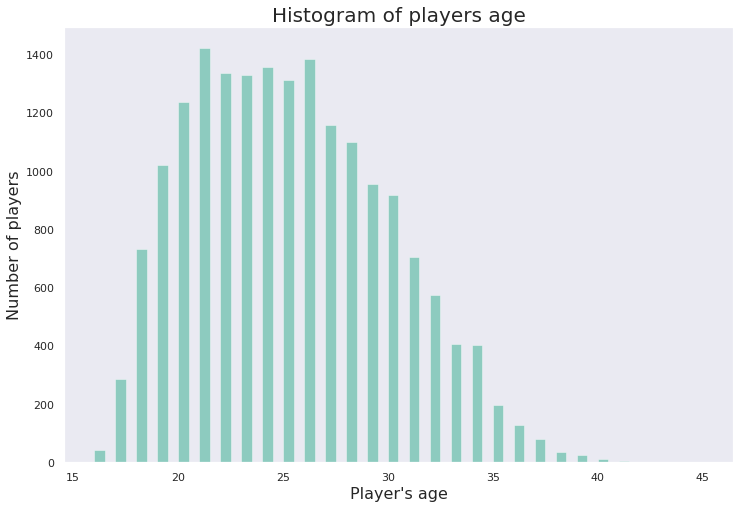

In [13]:
sns.set(style ="dark", palette="colorblind", color_codes=True)
x = df.Age
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 58, kde = False, color='g')
ax.set_xlabel(xlabel="Player\'s age", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Histogram of players age', fontsize=20)
plt.show()

**Plotting BoxPlot to plot the relationship between Overall and Preferred Foot by Skill Moves of players.**

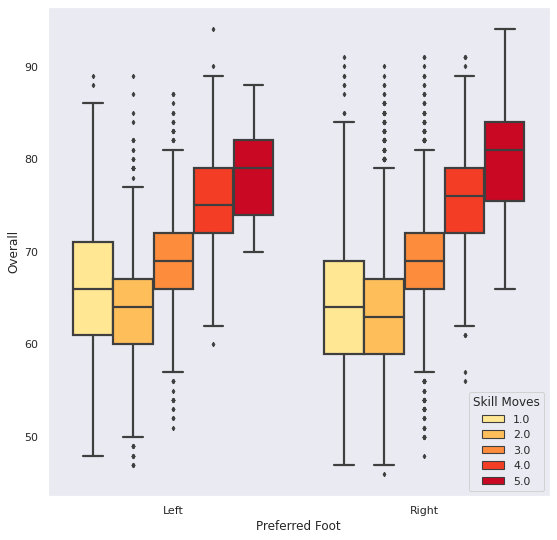

In [14]:
plt.figure(figsize = (9,9))
sns.boxplot(x="Preferred Foot", y="Overall", hue="Skill Moves", linewidth=2.2, fliersize= 3.2 ,data=df, saturation=1, palette="YlOrRd")
plt.show()

**Plotting BoxPlot to plot the relationship between Overall and Weak Foot of players.**

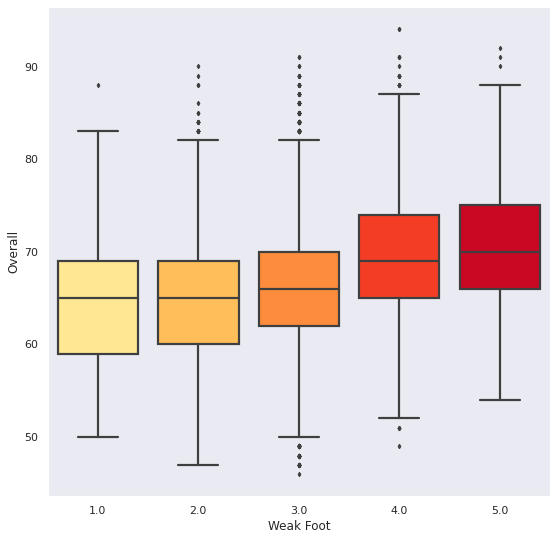

In [15]:
plt.figure(figsize = (9,9))
sns.boxplot(x="Weak Foot", y="Overall", linewidth=2.2, fliersize= 3.2 ,data=df, saturation=1, palette="YlOrRd")
plt.show()

**Plotting Violin Plot to show the Distribution of player's ratings based on their positions.**

In [16]:
mappedLines = {
    "CB": "DEF","CDM": "MID", "CM": "MID","CF": "ATT", "ST": "ATT"
}
orderedGeneralPosition = mappedLines.keys()

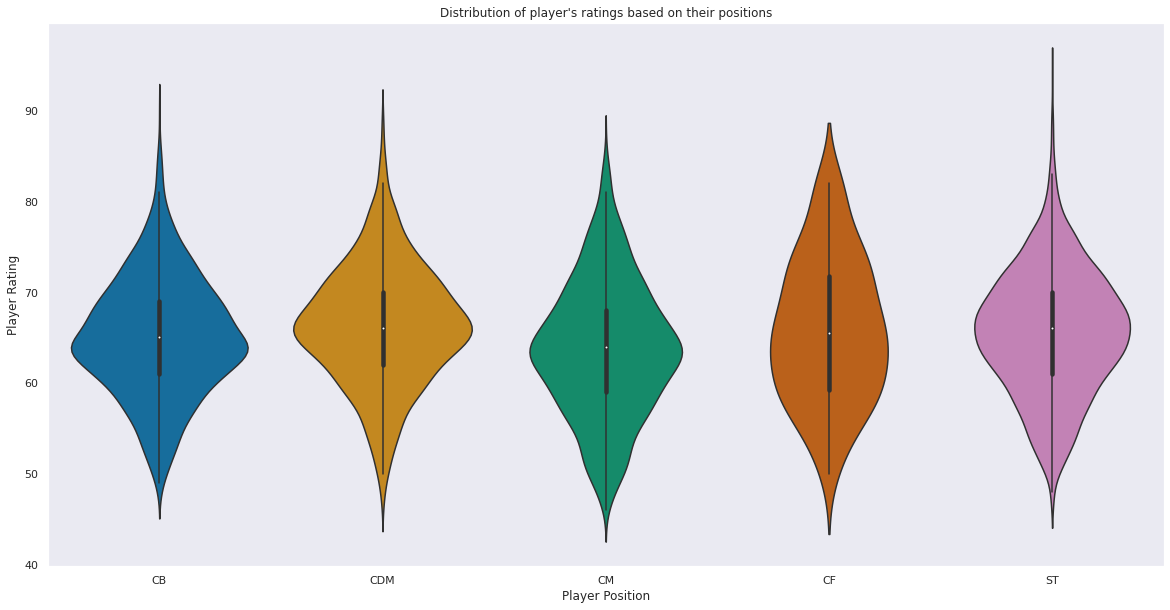

In [17]:
plt.figure(figsize=(20,10))
ax = sns.violinplot(data = df, x = "Position", y="Overall", order=orderedGeneralPosition)
ax.set(xlabel="Player Position", ylabel = "Player Rating", title = "Distribution of player's ratings based on their positions")
plt.show()

**Plotting Violin Plot to show the Distribution of age in some famous clubs.**

Text(0.5, 1.0, 'Distribution of age in some famous clubs')

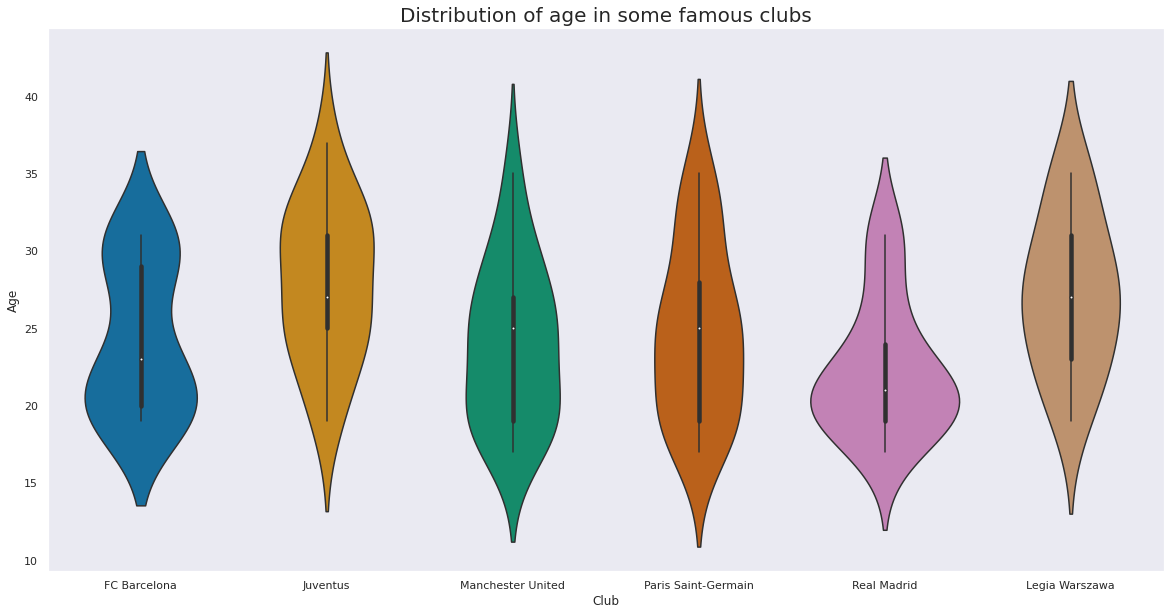

In [18]:
some_clubs = ('Juventus', 'Real Madrid', 'Paris Saint-Germain', 'FC Barcelona', 'Legia Warszawa', 'Manchester United')
df_club = df.loc[df['Club'].isin(some_clubs) & df['Age']]

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.violinplot(x="Club", y="Age", data=df_club);
ax.set_title(label='Distribution of age in some famous clubs', fontsize=20)

**Plotting Joint Plot to show the relationship between Age and Potential of players**

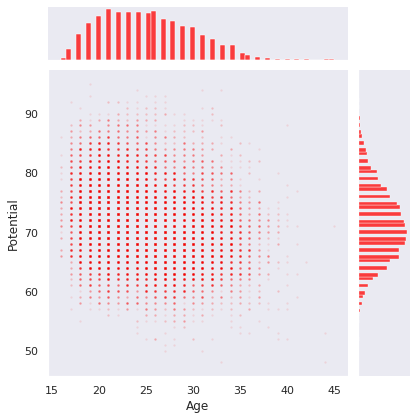

In [19]:
sns.jointplot(x=df['Age'],y=df['Potential'],
              joint_kws={'alpha':0.1,'s':5,'color':'red'},
              marginal_kws={'color':'red'})

Potential tends to fall as you grow old.

**Plotting LM Plot to show the relationship between Age and SprintSpeed of players.**

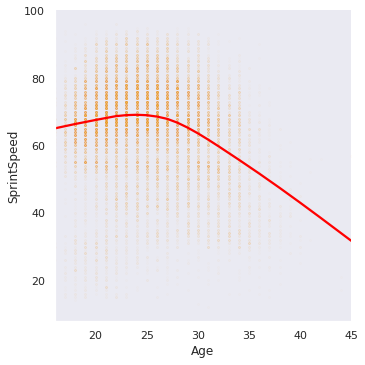

In [20]:
sns.lmplot(data = df, x = 'Age', y = 'SprintSpeed',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'orange'},line_kws={'color':'red'})

As the age increases the sprint speed decreases.

**Plotting LM Plot for showing the relationship between BallControl and Dribbling by Preferred Foot of players.**

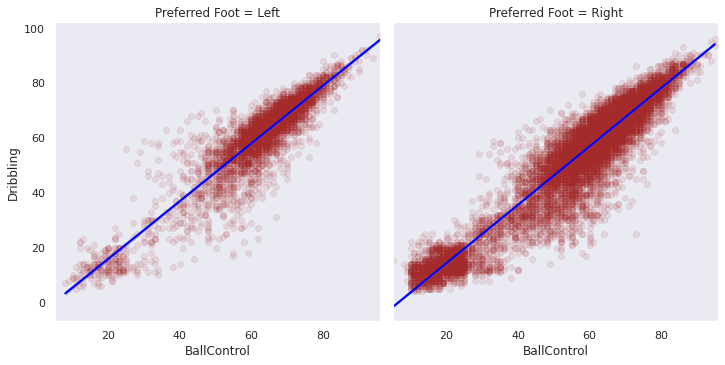

In [21]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = df,col = 'Preferred Foot',scatter_kws = {'alpha':0.1,'color':'brown'},
           line_kws={'color':'blue'})

**Clustermap plotting for an overview.**

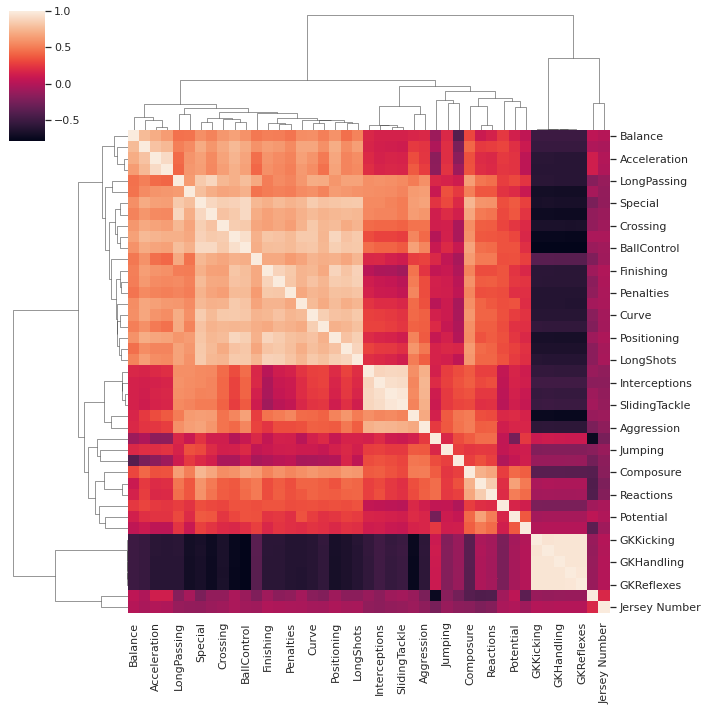

In [22]:
sns.clustermap(df.corr(),annot = False)

**Plotting Cat Plot for showing the relationship between Age Categories and Overall by Preferred Foot of players.**

In [23]:
df["Age_categ"]=pd.cut(df.Age,[15,20,25,30,35,40,45],labels=["15-20", "20-25", "25-30", "30-35", "35-40", "40-45"]) 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try violinplot
  warnings.warn(msg, UserWarning)


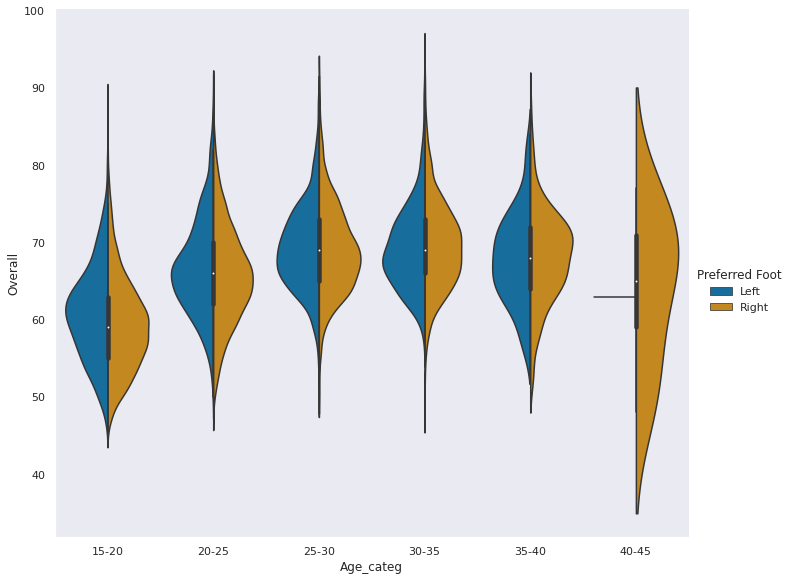

In [24]:
sns.catplot("Age_categ", "Overall", data=df, kind="violin", ax=ax, hue= "Preferred Foot", split=True,  height=8, aspect=1.2)

# Data Preprocessing

**Improving Value column so we can use it in Predictive Modelling.**

In [25]:
df['Value'] = df['Value'].str.replace('€','').str.replace('M',' 1000000').str.replace('K',' 1000')
df['Value'] = df['Value'].str.split(' ', expand=True)[0].astype(float) * df['Value'].str.split(' ', expand=True)[1].astype(float)
df['Value'] = df['Value'].fillna(0).astype(np.float32)

In [26]:
df.sort_values("Value", ascending=False)[['Name', "Age", "Value", "Overall"]].head(5)

,Name,Age,Value,Overall
2,Neymar Jr,26,118500000.0,92
0,L. Messi,31,110500000.0,94
4,K. De Bruyne,27,102000000.0,91
5,E. Hazard,27,93000000.0,91
15,P. Dybala,24,89000000.0,89


**Improving Wage column so we can use it in Predictive Modelling.**

In [27]:
df['Wage'] = df['Wage'].str.replace('€','').str.replace('M',' 1000000').str.replace('K',' 1000')
df['Wage'] = df['Wage'].str.split(' ', expand=True)[0].astype(float) * df['Wage'].str.split(' ', expand=True)[1].astype(float)
df['Wage'] = df['Wage'].fillna(0).astype(np.float32)

In [28]:
df.sort_values("Wage", ascending=False)[['Name', "Age", "Wage", "Overall"]].head(5)

,Name,Age,Wage,Overall
0,L. Messi,31,565000.0,94
7,L. Suárez,31,455000.0,91
6,L. Modrić,32,420000.0,91
1,Cristiano Ronaldo,33,405000.0,94
8,Sergio Ramos,32,380000.0,91


**Dropping unnecessary columns for better predictions.**

In [29]:
drop = [
    'ID', 'Name', 
    'Potential', 'Special', 
    'Real Face', 'Jersey Number',  'Contract Valid Until',
    'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 
    'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 
    'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'
]

df = df.drop(drop, axis=1)

In [30]:
X = df[['Age', 'Overall', 'Value', 'Wage',
       'International Reputation', 'Weak Foot', 'Skill Moves',
       'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]
y = df['Overall']

## Decision Tree Regressor ## 

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)
tree_reg.predict(X_test)

array([53., 64., 68., ..., 70., 58., 50.])

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(tree_reg, X, y, cv=10, scoring="accuracy")

array([0.13491189, 0.36949339, 0.5688326 , 0.46420705, 0.38436123,
       1.        , 0.39922907, 0.54295154, 0.10903084, 0.1553719 ])

## Linear Regression (scikit-learn)  

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
y_pred_train = reg.predict(X_train)
R_squared = reg.score(X_test, y_test)
R_squared

1.0

## R2 Score : 1.0

## KNeighborsRegressor  

In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
kRange = range(1,15,1)

scores_list = []
for i in kRange:
    regressor_knn = KNeighborsRegressor(n_neighbors = i)
    
    regressor_knn.fit(X_train,y_train)
    pred = regressor_knn.predict(X_test)
    
    scores_list.append(r2_score(y_test,pred))

In [35]:
regressor_knn = KNeighborsRegressor(n_neighbors = 3)

regressor_knn.fit(X_train,y_train)
pred = regressor_knn.predict(X_test)

r2_knn = r2_score(y_test,pred)
print(r2_knn)

0.9191379805416268


## R2 Score : 0.9191379805416268